In [2]:
import pandas as pd
import numpy as np

***Titanic data set***

In [3]:
df= pd.read_csv('/content/train.csv')


***How big is data***

In [4]:
df.shape

(891, 12)

***How does the data look***

In [5]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Sometime data is baised at start or last so we try to get random sample

In [6]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
168,169,0,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.925,NaN,S
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.750,NaN,Q
782,783,0,1,"Long, Mr. Milton Clyde",male,29.0,0,0,113501,30.000,D6,S
364,365,0,3,"O'Brien, Mr. Thomas",male,NaN,1,0,370365,15.500,NaN,Q
546,547,1,2,"Beane, Mrs. Edward (Ethel Clarke)",female,19.0,1,0,2908,26.000,NaN,S


***What is data type of cols***

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


***Are there any missing values***

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

***Hoe does the data look mathematically***

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


***Are there any duplicate values***

In [10]:
df.duplicated().sum()

0

***How is the correlation betwwn cols***

In [13]:
import pandas as pd


# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

print(correlation_matrix)


             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


In [14]:
numerical_df.corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

***Univariate analysis***     **Categorical Analysis**

We 'll need visuliazation technique : Seaborn , Matplotlib.**For Categorical Analysis**

In [15]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


a. Countplot: It tells frequency of **data**




In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Survived'>

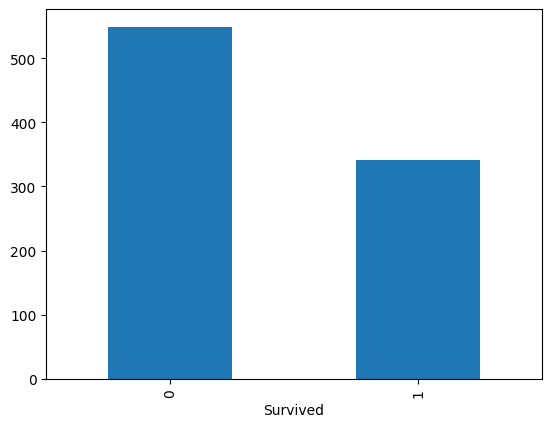

In [22]:
# sns.countplot(numerical_df['Survived'])
df['Survived'].value_counts().plot(kind='bar')

<Axes: xlabel='count', ylabel='Sex'>

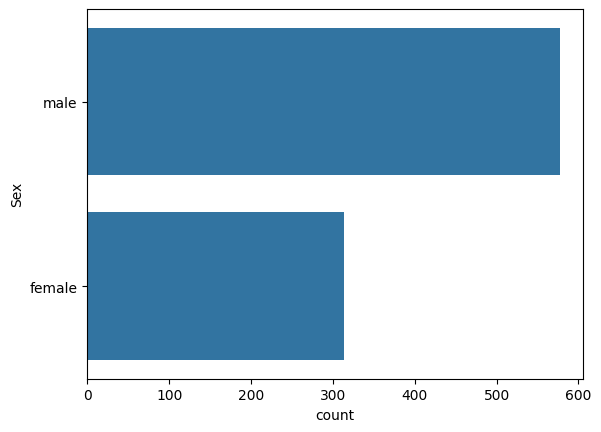

In [23]:
sns.countplot(df['Sex'])

<Axes: xlabel='count', ylabel='Embarked'>

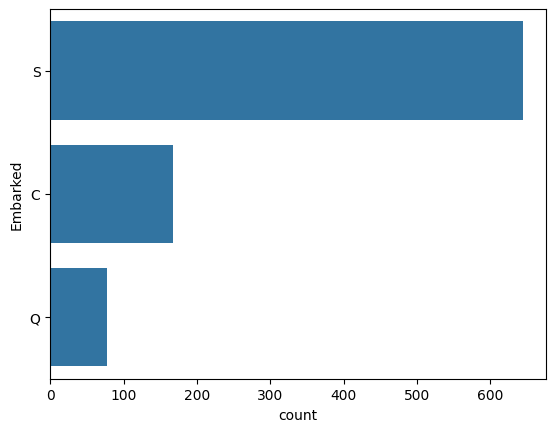

In [25]:
sns.countplot(df['Embarked'])

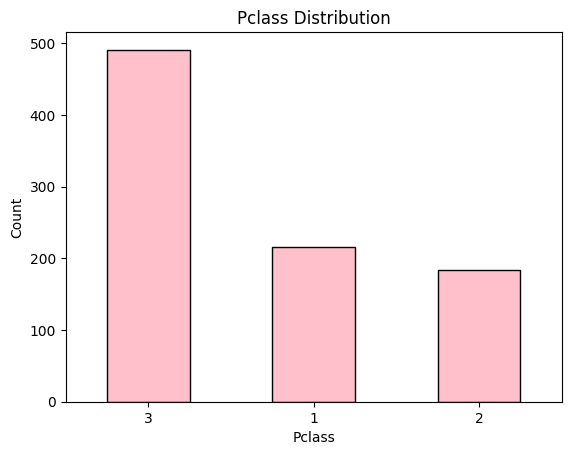

In [30]:
df['Pclass'].value_counts().plot(kind='bar',color='pink',edgecolor='black')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Pclass Distribution')
plt.xticks(rotation=0)
plt.show()

**"Piechart"**

<Axes: ylabel='count'>

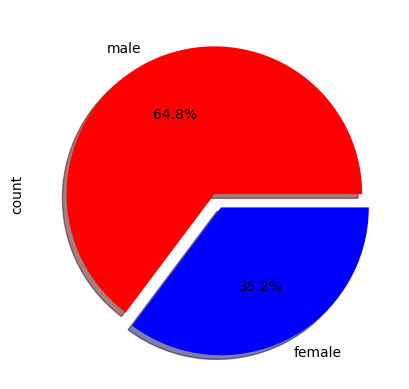

In [33]:
df['Sex'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,explode=[0,0.1],colors=['red','blue'])



<Axes: ylabel='count'>

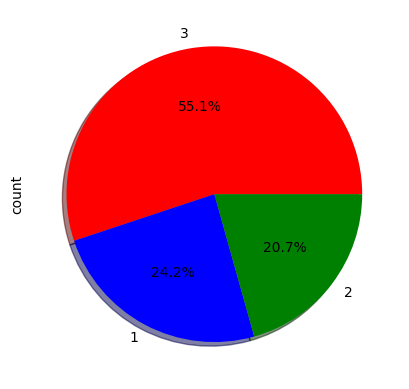

In [38]:
df['Pclass'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,colors=['red','blue','green'])

Numerical Data : -is continuous value. Here we can see mean, median, mode and we can make it behave like  categoriacal type of data.  

By creating bins (range) and break them in part, and can see distribution accordingly

Histogram for continuous data.


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

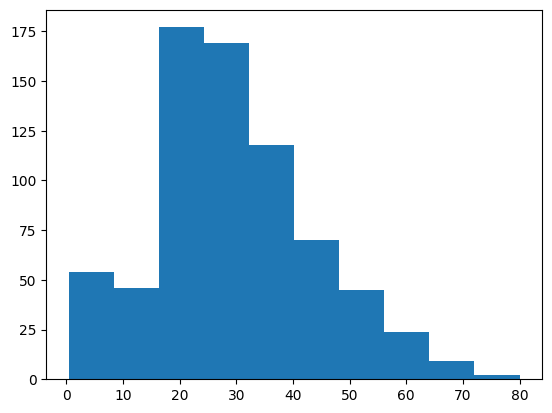

In [39]:
import matplotlib.pyplot as plt
plt.hist(df['Age'])

Increase the bins> of histogram

**Distplot**  : KDE (kernel density probability).
Probability Distribution Function, It tells the distribution with probability.
It tells the probability of a number that exists in that range.
Where, Histogram tells the exact value of a range.
It also tells the skwewness of data(Symmetrical,Unsymmetrical)

<ipython-input-45-0fafe04ea3f6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

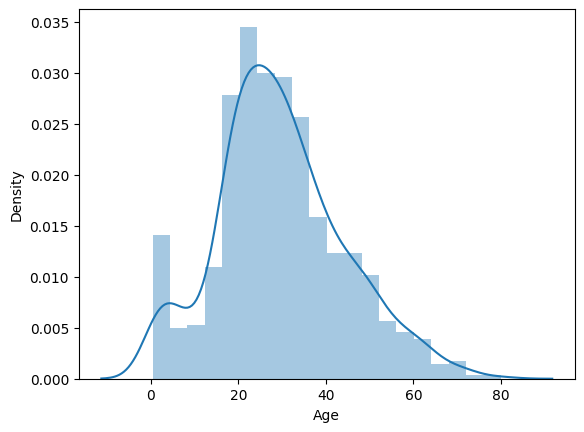

In [45]:
sns.distplot(df['Age'])

In [51]:
df['Age'].skew()

0.38910778230082704

Boxplot : It tells , 5 number of summary .


<Axes: ylabel='Fare'>

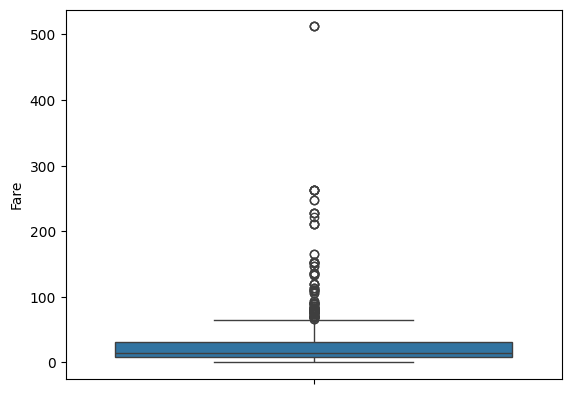

In [46]:
sns.boxplot(df['Fare'])

<Axes: ylabel='Age'>

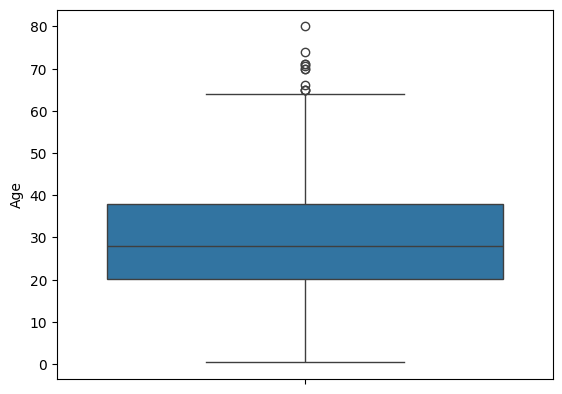

In [48]:
sns.boxplot(df['Age'])

In [49]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [50]:
df['Age'].min()

0.42

**EDA using Bivariate and Multivariate Analysis**

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
tips = sns.load_dataset('tips')
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [54]:
flights = sns.load_dataset('flights')
flights.head(3)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132


In [55]:
iris = sns.load_dataset('iris')
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [56]:
titanic = pd.read_csv('/content/train.csv')
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


Scatterplot (Bivariate analysis) : Numerical-Numerical(Scatterplot)

Lets see the data set of tips and find out correlation between total_bill and tip

In [61]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


<Axes: xlabel='total_bill', ylabel='tip'>

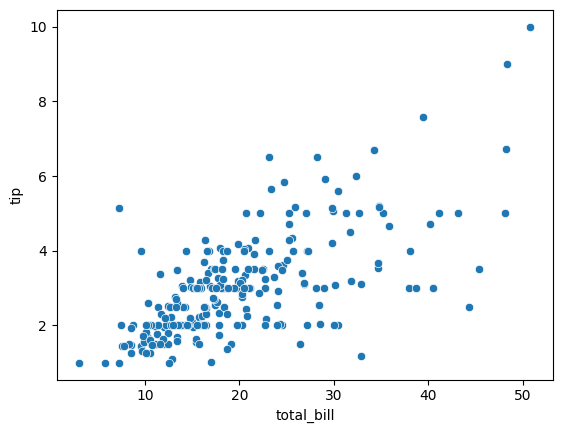

In [57]:
  sns.scatterplot(x='total_bill',y='tip',data=tips)

Multivariant analysis : more than two columns

<Axes: xlabel='total_bill', ylabel='tip'>

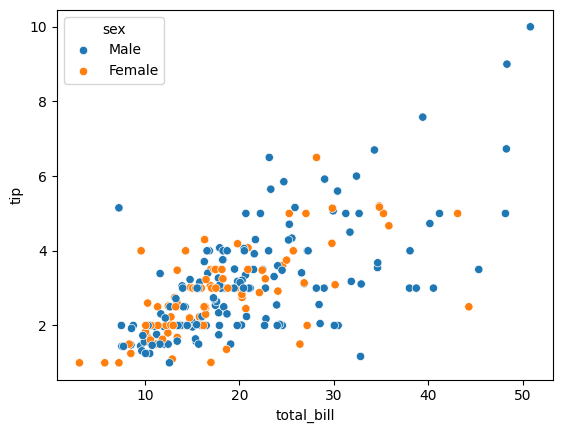

In [60]:
sns.scatterplot(x='total_bill',y='tip',hue='sex',data=tips)

<Axes: xlabel='total_bill', ylabel='tip'>

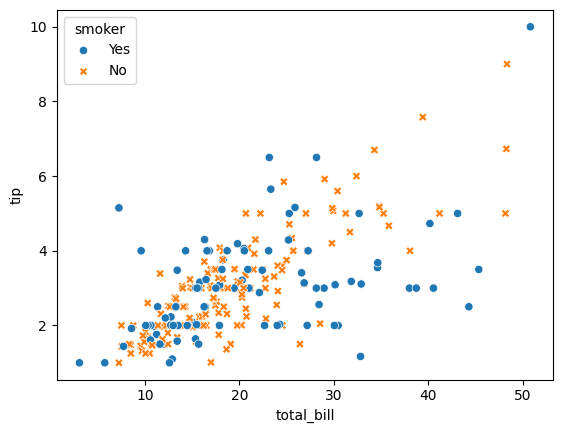

In [62]:
sns.scatterplot(x='total_bill',y='tip',hue='smoker',style ='smoker',data=tips)

<Axes: xlabel='total_bill', ylabel='tip'>

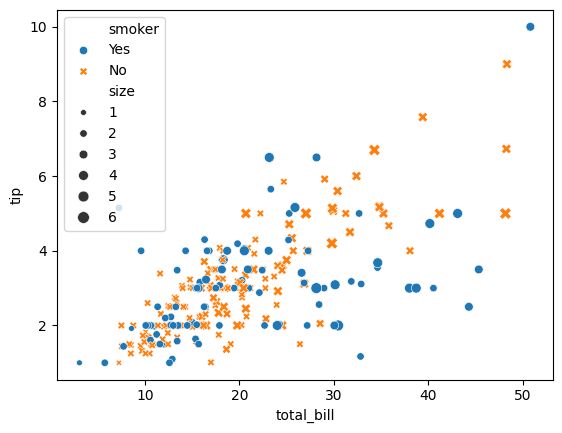

In [63]:
sns.scatterplot(x='total_bill',y='tip',hue='smoker',style ='smoker',size='size',data=tips)

**Numerical Caetgorical**    : Bar plot

In [64]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


average age travelling according to the Pclass - black line is confidence interval.



<Axes: xlabel='Pclass', ylabel='Age'>

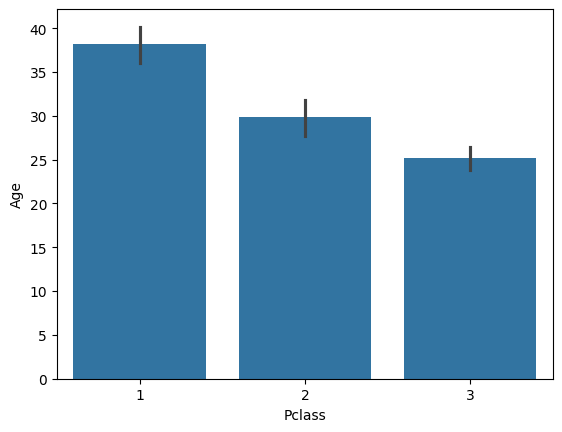

In [66]:
sns.barplot(x='Pclass',y='Age',data=titanic)

Relation between Pclass and Fare

<Axes: xlabel='Pclass', ylabel='Fare'>

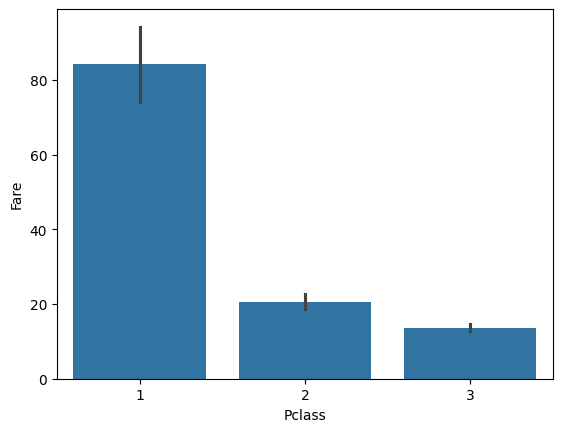

In [67]:
sns.barplot(x='Pclass',y='Fare',data=titanic)

Relation between pclass, fare sex

<Axes: xlabel='Pclass', ylabel='Fare'>

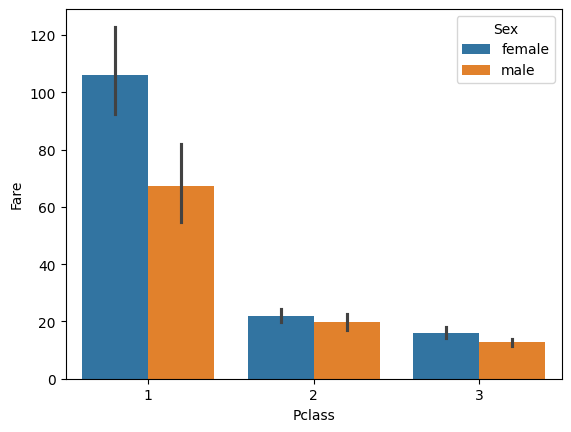

In [68]:
sns.barplot(x='Pclass',y='Fare',hue='Sex',data = titanic)

**Numerical, categorical :- BoxPlot**

In [69]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


<Axes: xlabel='Sex', ylabel='Age'>

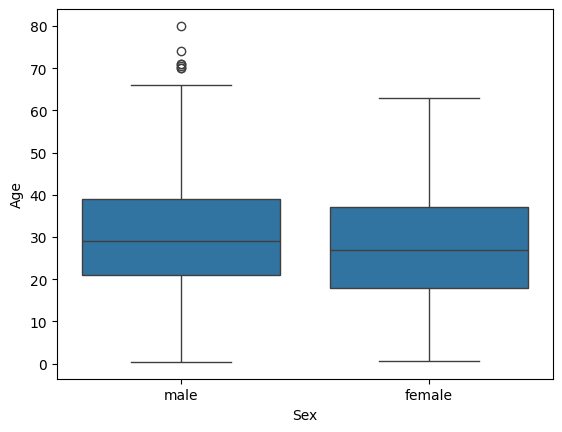

In [73]:
sns.boxplot(x='Sex',y='Age',data=titanic)

<Axes: xlabel='Sex', ylabel='Age'>

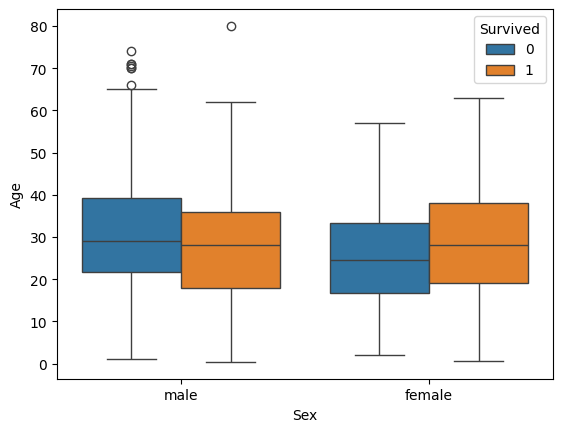

In [74]:
sns.boxplot(x='Sex',y='Age',hue='Survived',data=titanic)

Distplot : Numerical-Categorical

<ipython-input-76-0c31bc422368>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['Age'])


<Axes: xlabel='Age', ylabel='Density'>

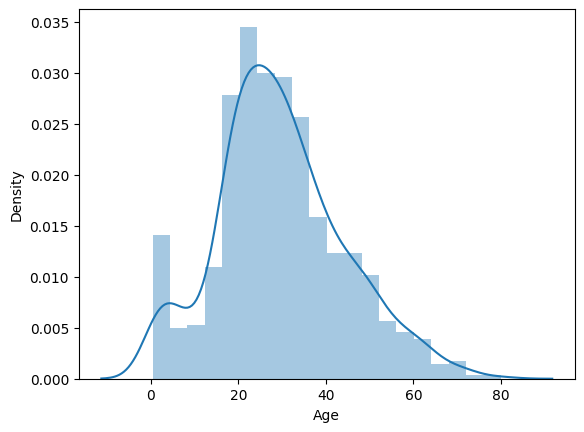

In [76]:
sns.distplot(titanic['Age'])

Now , I want to Compare data with survived and non survived

<ipython-input-79-aeca3446dec3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic[titanic['Survived']==1]['Age'])
<ipython-input-79-aeca3446dec3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic[titanic['Survived']==0]['Age'])


<Axes: xlabel='Age', ylabel='Density'>

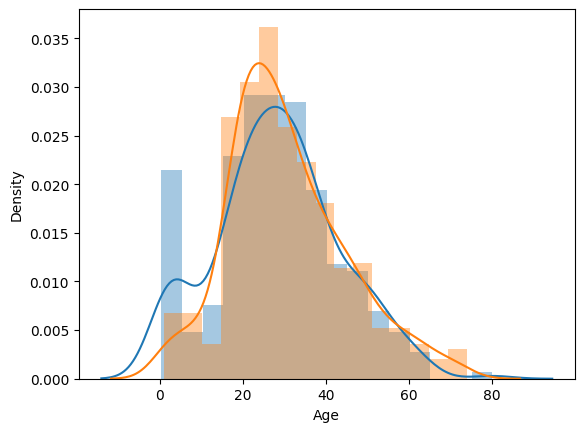

In [79]:
sns.distplot(titanic[titanic['Survived']==1]['Age'])
sns.distplot(titanic[titanic['Survived']==0]['Age'])

means probabilty of survival for young ones are higher.in 15 to 30 survival rate is lower

<ipython-input-80-5a0cf208efaf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic[titanic['Survived']==1]['Age'],hist=False)
<ipython-input-80-5a0cf208efaf>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic[titanic['Survived']==0]['Age'],hist=False)


<Axes: xlabel='Age', ylabel='Density'>

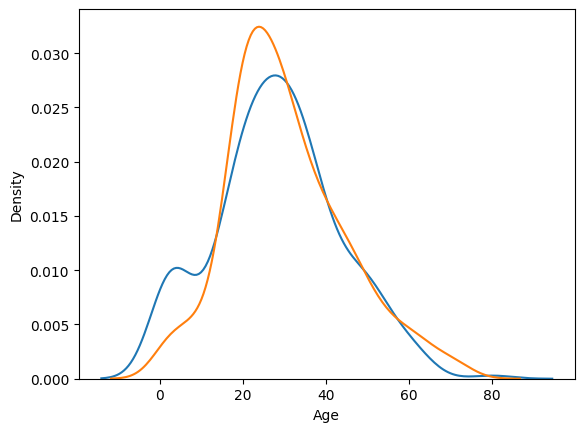

In [80]:
sns.distplot(titanic[titanic['Survived']==1]['Age'],hist=False)
sns.distplot(titanic[titanic['Survived']==0]['Age'],hist=False)

HeatMap :- Categorical - Categorical
          surival or non survival with Pclass

In [81]:
pd.crosstab(titanic['Survived'],titanic['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


<Axes: xlabel='Pclass', ylabel='Survived'>

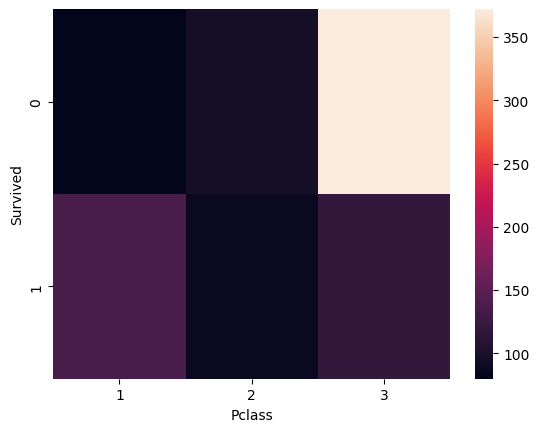

In [82]:
sns.heatmap(pd.crosstab(titanic['Survived'],titanic['Pclass']))

To get more exact scenerio , by percentage that which class was more deadly.

In [88]:
titanic.groupby('Pclass')['Survived'].mean()*100

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

<Axes: xlabel='Pclass'>

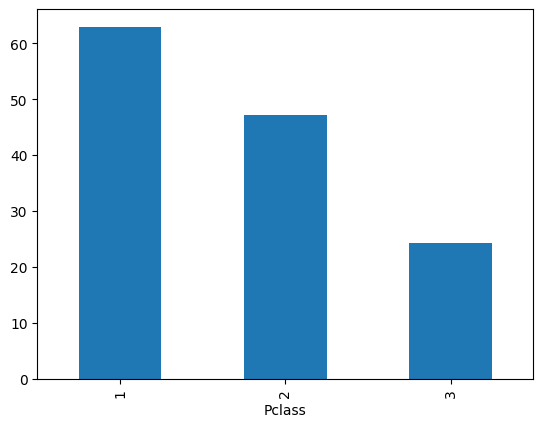

In [90]:
titanic.groupby('Pclass')['Survived'].mean().mul(100).plot(kind='bar')

In [92]:
pd.crosstab(titanic['Survived'],titanic['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


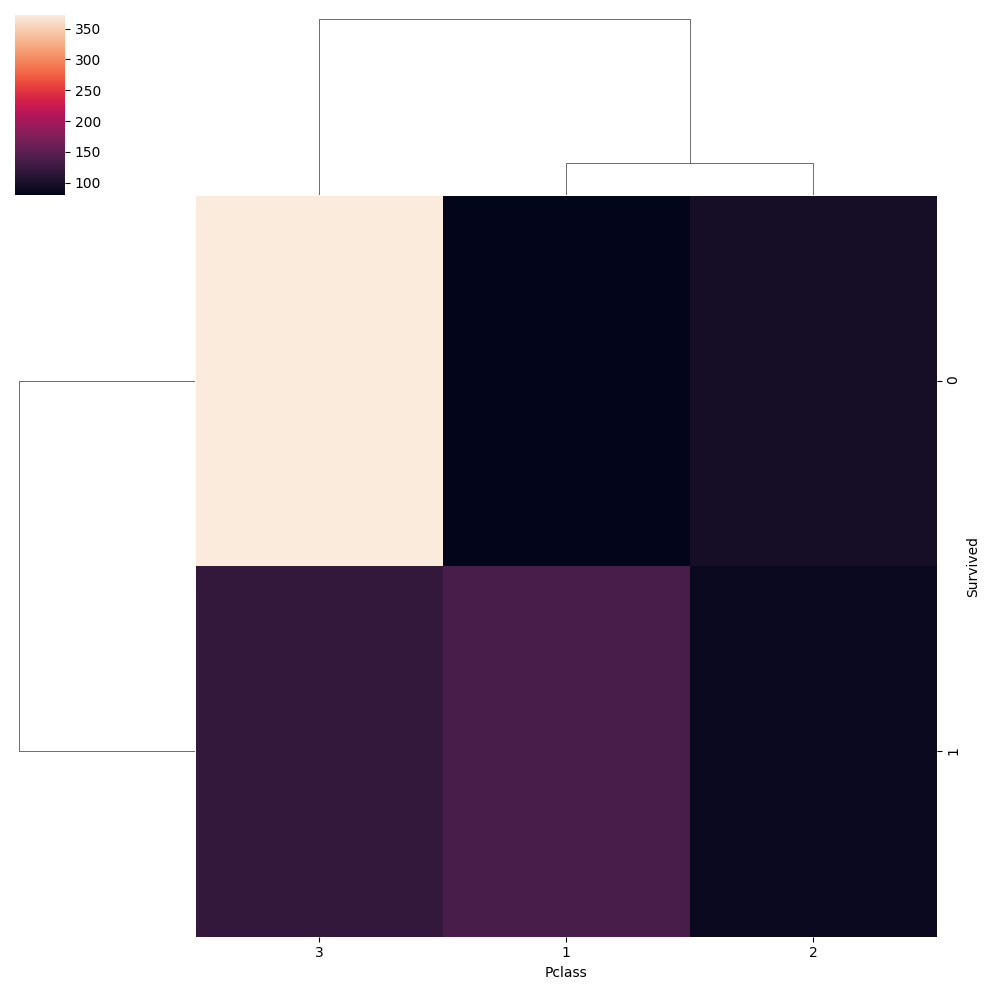

In [93]:
sns.clustermap(pd.crosstab(titanic['Survived'],titanic['Pclass']))

In [95]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [96]:
pd.crosstab(titanic['Survived'],titanic['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


ClusterMap tells about closeness the comparison of values so we dont use heatmap

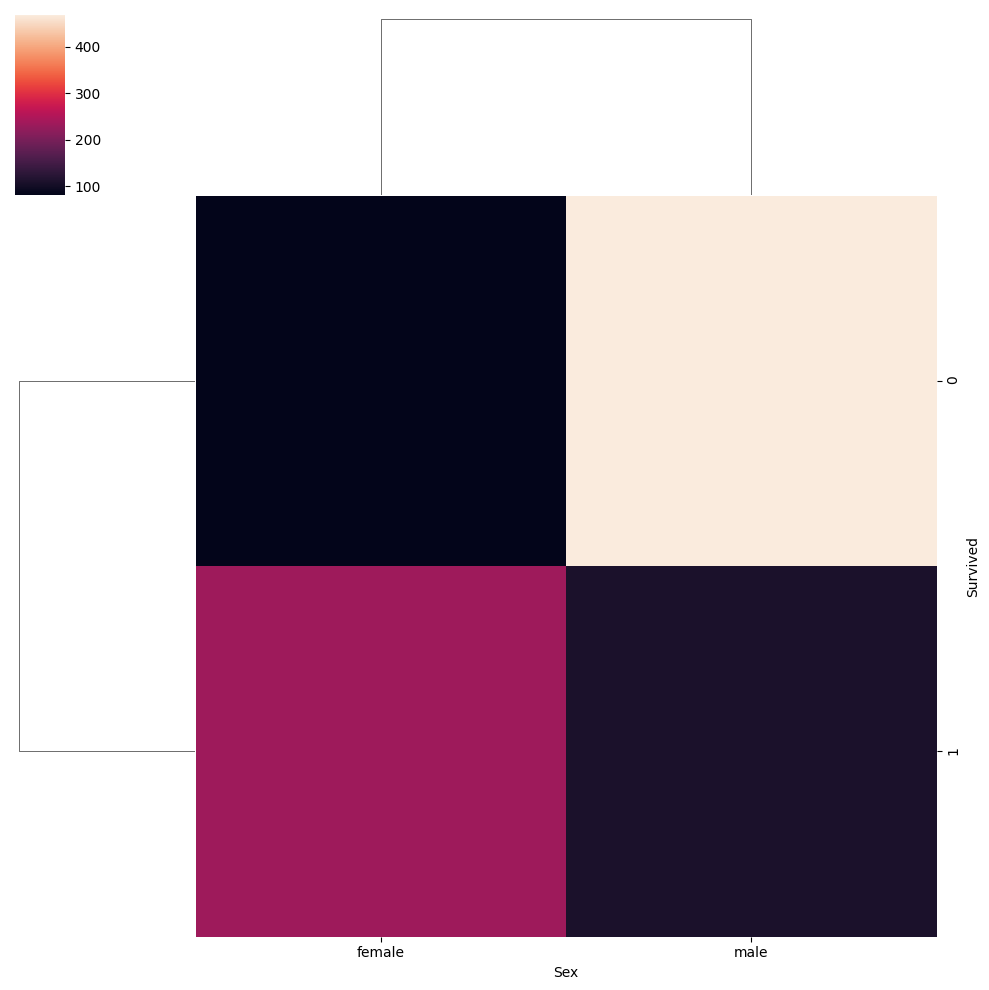

In [98]:
sns.clustermap(pd.crosstab(titanic['Survived'],titanic['Sex']))

In [100]:
titanic.groupby('Survived')['Sex'].value_counts()

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: count, dtype: int64

In [102]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


Pairplot : Is collection of scatter plot. If we have  multiple numerical columns

In [106]:
 iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


It works with numerical values and find comparison between them.

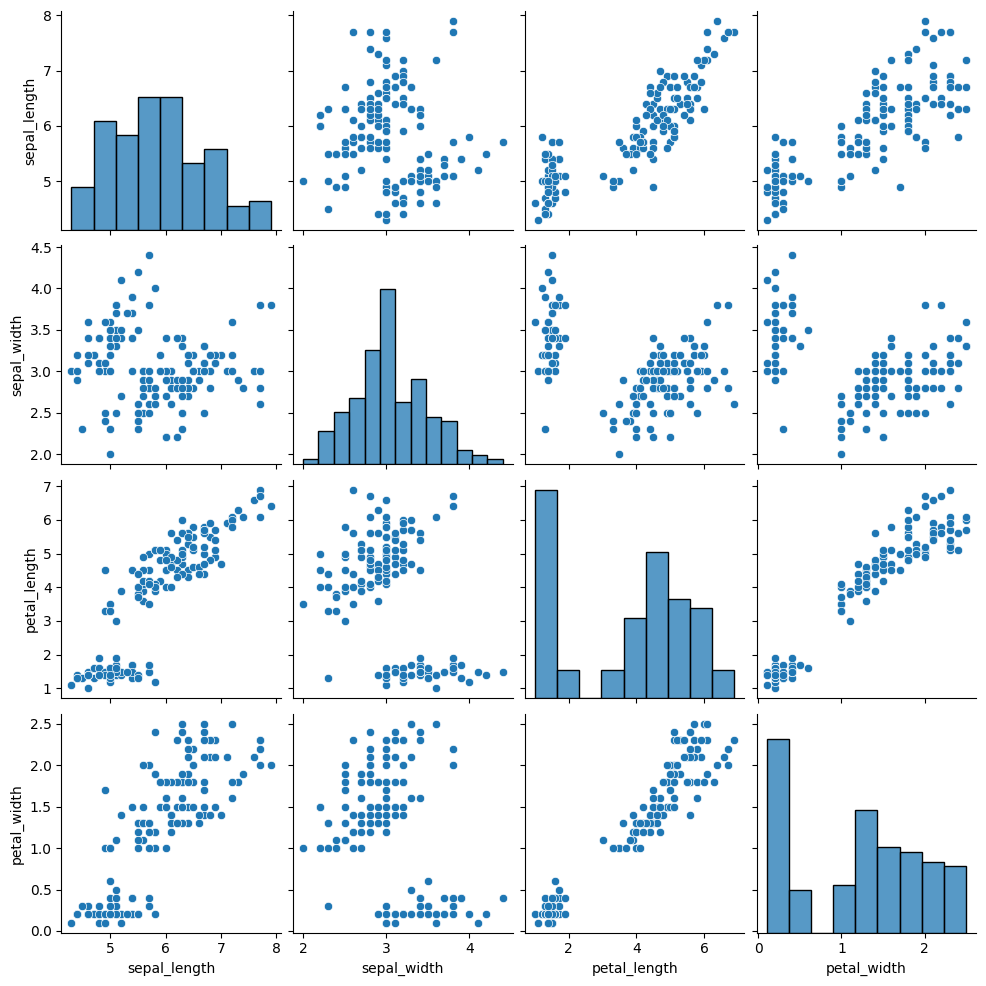

In [107]:
sns.pairplot(iris)

Adding hue values:

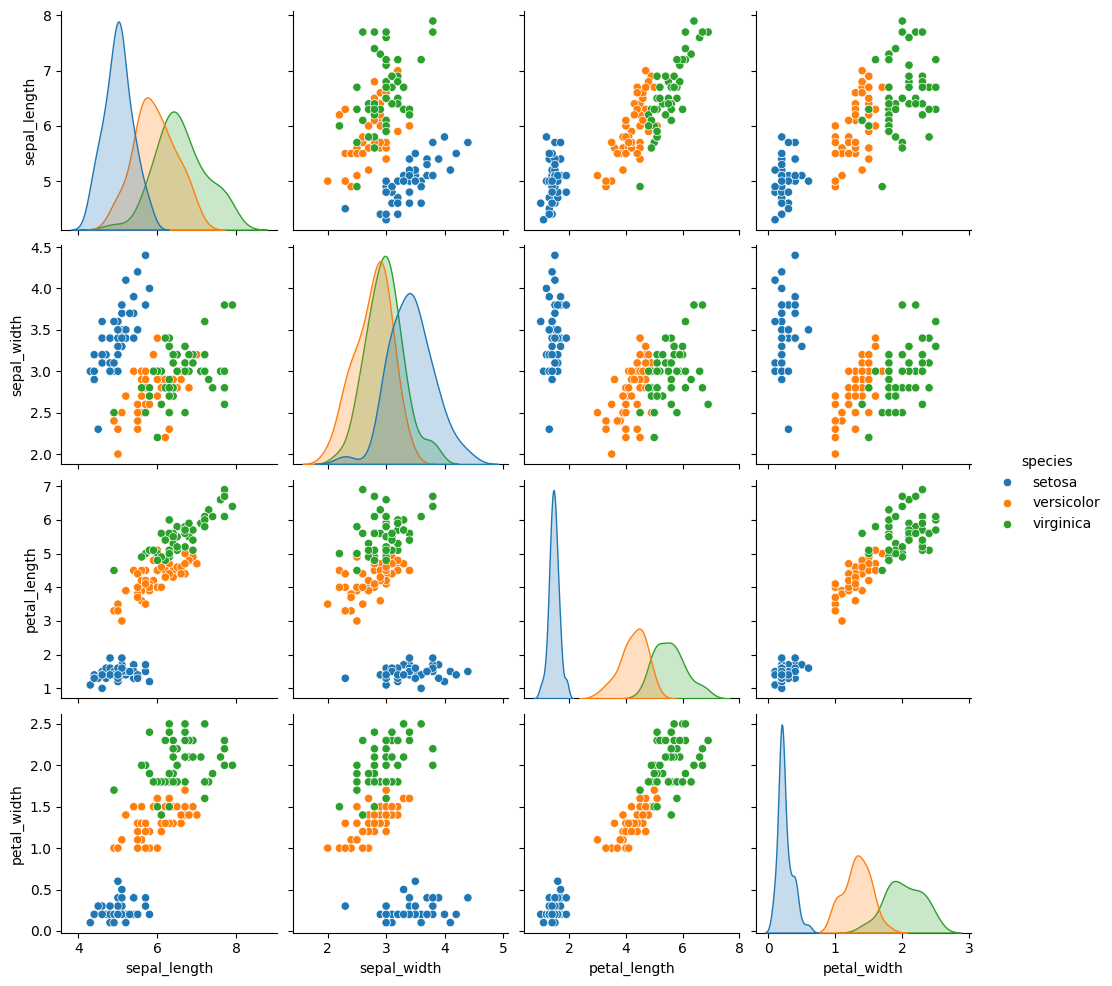

In [108]:
sns.pairplot(iris,hue='species')

In [109]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Lineplot : (Numerical-Numerical)

In [110]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [113]:
flights.groupby('year').sum()

TypeError: category type does not support sum operations

In [118]:
# Convert the 'year' column to a numeric type before summing
flights['year'] = flights['year'].astype(int)
new = flights.groupby('year')['passengers'].sum().reset_index()
new

,year,passengers
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700
5,1954,2867
6,1955,3408
7,1956,3939
8,1957,4421
9,1958,4572


<Axes: xlabel='year', ylabel='passengers'>

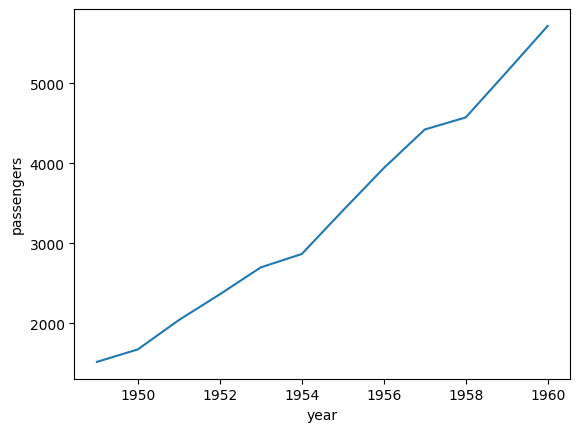

In [119]:
sns.lineplot(x='year',y='passengers',data=new)

Heatmap in flights dataset : but how : by pivot tables. V,I,C

In [120]:
flights.pivot_table(values='passengers',index='month',columns='year')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<Axes: xlabel='year', ylabel='month'>

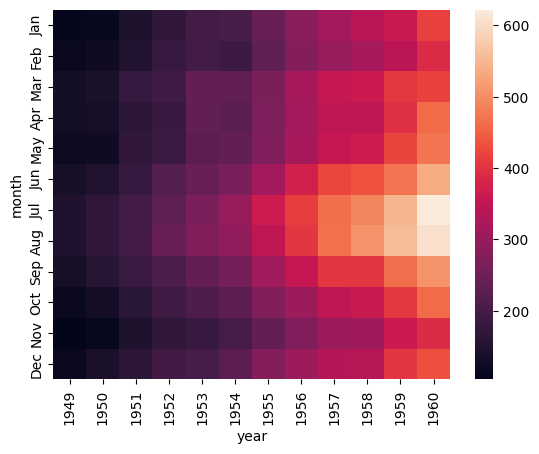

In [121]:
sns.heatmap(flights.pivot_table(values='passengers',index='month',columns='year'))

clustermap : will close those group that are similar

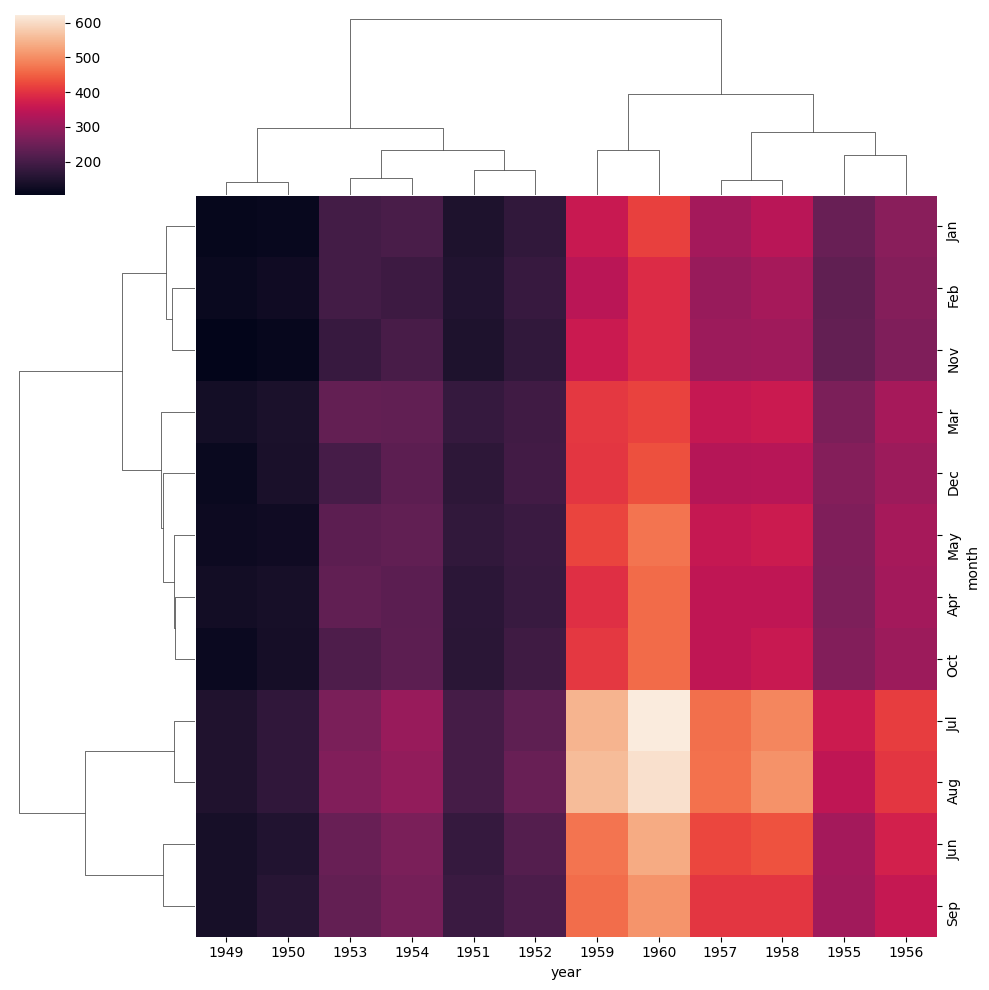

In [123]:
sns.clustermap(flights.pivot_table(values='passengers',index='month',columns='year'))